map all the IDRs from disprot to the CRE dataset  
Disprot info:
Version: 9.2
Release: 2022_06
Number of entries: 2419

In [1]:
import pandas as pd
import re
import pyranges as pr
import matplotlib.pyplot as plt

In [2]:
cre_dataset = pd.read_csv('../datasets/cre_dataset.csv')

In [3]:
cre_dataset

,name,uniprot_acc,species,references,module,start_aa,end_aa,dataset,id_cre
0,DNMT1,P13864,M. musculus,"(Song et al., 2011; Trudeau et al., 2013)",d,699,733,train,1
1,TBP,P20226,H. sapiens,"(Kuddus and Schmidt, 1993; Trudeau et al., 2013)",d,1,55,train,2
2,TAK1,Q62073,M. musculus,"(Yamaguchi et al., 1995)",d,1,22,train,3
3,SNF1,P06782,S. crevisiae,"(Jiang and Carlson, 1997; Trudeau et al., 2013)",d,392,495,train,4
4,TSE1,P10644,H. sapiens,"(Francis et al., 2002)",d,1,98,train,5
...,...,...,...,...,...,...,...,...,...
163,NLRC4,Q3UP24,M. musculus,"(Hu et al., 2013)",s,299,355,test,164
164,Park2,Q9JK66,R. norvegicus,"(Byrd and Weissman, 2013)",s,410,465,test,165
165,EB1,Q15691,H. sapiens,"(Kanaba et al., 2013)",s,189,268,test,166
166,gp47,P04521,Enterobacteria phage T4,"(Gao and Nelson, 2014)",s,303,320,test,167


Text(0.5, 1.0, 'distribution of Length of CREs')

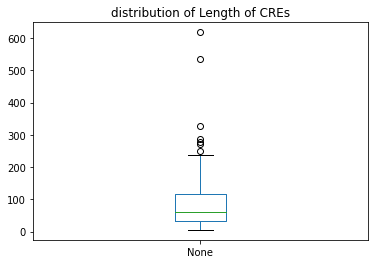

In [7]:
(cre_dataset.end_aa - cre_dataset.start_aa).plot.box()
plt.title("distribution of Length of CREs")

In [6]:
(cre_dataset.end_aa - cre_dataset.start_aa) > 100

0      False
1      False
2      False
3       True
4      False
       ...  
163    False
164    False
165    False
166    False
167    False
Length: 168, dtype: bool

In [7]:
disprot_raw = pd.read_csv('../raw_data/DisProt release_2022_06 with_ambiguous_evidences.tsv', sep= '\t')
disprot_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   acc              10337 non-null  object 
 1   name             10337 non-null  object 
 2   organism         10337 non-null  object 
 3   ncbi_taxon_id    10337 non-null  int64  
 4   disprot_id       10337 non-null  object 
 5   region_id        10337 non-null  object 
 6   start            10337 non-null  int64  
 7   end              10337 non-null  int64  
 8   term_namespace   10337 non-null  object 
 9   term             10337 non-null  object 
 10  ec               10337 non-null  object 
 11  reference        10337 non-null  object 
 12  region_sequence  10337 non-null  object 
 13  confidence       511 non-null    object 
 14  obsolete         0 non-null      float64
dtypes: float64(1), int64(3), object(11)
memory usage: 1.2+ MB


In [8]:
# unique entries
disprot_raw.acc.nunique()

2419

In [9]:
disprot = disprot_raw[['acc', 'name', 'start', 'end']]
disprot

,acc,name,start,end
0,P03265,DNA-binding protein,294,334
1,P03265,DNA-binding protein,454,464
2,P49913,Cathelicidin antimicrobial peptide,134,170
3,P49913,Cathelicidin antimicrobial peptide,134,170
4,P49913,Cathelicidin antimicrobial peptide,134,170
...,...,...,...,...
10332,P40939,"Trifunctional enzyme subunit alpha, mitochondrial",637,647
10333,Q6CSX2,Serine/threonine-protein kinase ATG1,562,831
10334,Q6CSX2,Serine/threonine-protein kinase ATG1,562,831
10335,Q8IYT8,Serine/threonine-protein kinase ULK2,168,177


In [10]:
disprot[disprot.acc.isin(cre_dataset.uniprot_acc)].acc.nunique()

39

In [11]:
cre_dataset.uniprot_acc.nunique()

151

In [12]:
uniprots = [ str(i)+"," for i in cre_dataset.uniprot_acc.unique()]
#"".join(uniprots)

API search in mobidb for CRE proteins  
https://mobidb.bio.unipd.it/api/download?acc=P13864,P20226,Q62073,P06782,P10644,P15498,Q63450,P00523,P10105,P28829,P45442,P49674,Q93107,C8ZE58,O76360,P63328,O88933,O94532,P26038,P32851,P42768,Q13153,Q60591,Q60437,Q5VT25,P52293,Q6FI27,Q9PUQ1,P33339,P06401,P11308,P27577,P31323,P31751,A8KAM8,P15336,P19419,P28324,P41971,P43403,Q07960,Q9H2X6,O08967,O96013,Q9NR80,P35968,Q08050,Q8VDP3,P17948,P35916,Q00722,Q13625,Q9Y613,O14974,Q8NQJ3,Q8Y842,P97360,Q08499,O08808,O14745,O43639,Q07912,Q8WUM4,Q9Y4D1,Q06413,P00579,P11799,P05129,P00782,Q64287,Q94527,P36956,Q63622,Q00422,Q12851,Q8IVH8,P17606,P26663,P29475,P31007,Q9UKW6,P55957,P04629,Q16620,P12814,Q01705,P53041,P10911,P29323,P35520,P50586,Q96RG2,Q62120,P00519,P70336,O15146,P06213,P10721,P12003,P14633,P36888,P19174,P78545,Q00944,Q04721,Q9Y2X7,P70208,O08722,O74536,Q99N57,Q9NP95,P11142,Q9Y4K3,Q07889,P08191,Q9Z0R4,Q5EGY4,Q92985,O76074,Q96RR4,Q9P246,P14598,P17210,P04637,P13508,P22607,Q15027,Q86WV6,Q06263,P32527,Q04206,Q15942,Q01970,Q9UR24,O97143,P46108,Q06124,Q3KK31,Q96B97,Q9H7B4,Q9HAU4,Q01974,P22681,P32917,Q15418,Q9BY11,Q3UP24,Q9JK66,Q15691,P04521,P41743&format=tsv&projection=prediction-disorder-mobidb_lite

In [13]:
mobidb_lite = pd.read_csv('../raw_data/mobidb_result_2022-09-05T15_04_47.929Z.tsv', sep= '\t')
print(mobidb_lite.shape)
mobidb_lite.info()

(115, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc               115 non-null    object 
 1   feature           115 non-null    object 
 2   start..end        115 non-null    object 
 3   content_fraction  115 non-null    float64
 4   content_count     115 non-null    int64  
 5   length            115 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [14]:
# Format start and end cols
mobidb_lite["start..end"] = mobidb_lite["start..end"].str.split(",")
mobidb_lite = mobidb_lite.explode('start..end')
mobidb_lite["start..end"] = mobidb_lite["start..end"].apply(lambda x: re.findall('^(\d+)\..(\d+)$', x))
mobidb_lite["start..end"] = mobidb_lite["start..end"].str[0]
mobidb_lite["start"] = mobidb_lite["start..end"].str[0].astype(int)
mobidb_lite["end"] = mobidb_lite["start..end"].str[1].astype(int)

In [15]:
mobidb_lite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 114
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc               270 non-null    object 
 1   feature           270 non-null    object 
 2   start..end        270 non-null    object 
 3   content_fraction  270 non-null    float64
 4   content_count     270 non-null    int64  
 5   length            270 non-null    int64  
 6   start             270 non-null    int32  
 7   end               270 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 16.9+ KB


In [16]:
cre_dataset.uniprot_acc.nunique()

151

In [17]:
mobidb_lite.acc.nunique()

115

In [18]:
mobidb_lite.drop(columns= ["feature", "start..end"], inplace= True)

<AxesSubplot:>

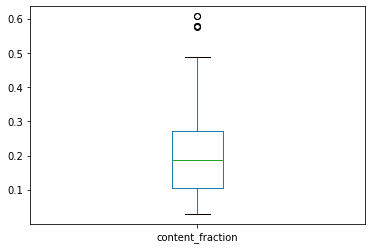

In [19]:
mobidb_lite.content_fraction.plot.box()

---

# Evaluate overlap between CREs and MobiDB-lite IDRs

In [20]:
# Check overlaps between CREs and IDRs
cre = cre_dataset[['uniprot_acc', 'id_cre', 'start_aa', 'end_aa']].copy()
cre.rename(columns= {'uniprot_acc': 'Chromosome', 'start_aa': 'Start', 'end_aa': 'End'}, inplace= True)
cre = cre.sort_values('id_cre')
cre = pr.PyRanges(cre)

In [21]:
idr = mobidb_lite[['acc', 'start', 'end']].copy()
idr.rename(columns= {
        'acc': 'Chromosome',
        'start': 'Start',
        'end': 'End'}, inplace= True
)
idr = pr.PyRanges(idr)

In [22]:
cre = cre.count_overlaps(idr, overlap_col="Count_mobidb")
#cre = cre.as_df()
cre

,Chromosome,id_cre,Start,End,Count_mobidb
0,A8KAM8,43,1006,1106,1
1,C8ZE58,15,604,741,2
2,O08722,124,544,688,0
3,O08808,72,1180,1199,0
4,O08967,54,251,266,0
...,...,...,...,...,...
163,Q63622,86,158,408,0
164,Q64287,83,410,439,0
165,Q92985,134,404,466,0
166,Q93107,14,91,157,2


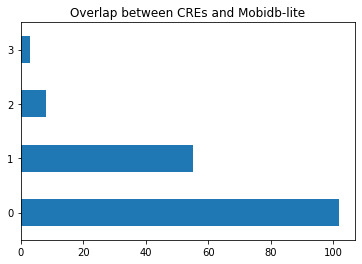

In [23]:
cre.Count_mobidb.value_counts().plot(kind='barh')
plt.title("Overlap between CREs and Mobidb-lite")
plt.show()

In [64]:
print(f"matching overlap is {cre[cre.Count_mobidb != 0]}")

TypeError: 'int' object is not callable

In [68]:
round(66/168, 2)

0.39

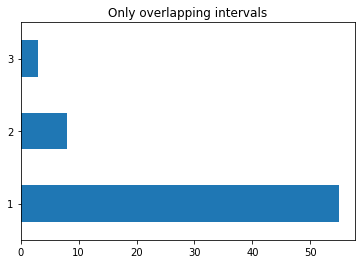

In [61]:
cre[cre.Count_mobidb != 0].as_df().Count_mobidb.value_counts().plot(kind='barh')
plt.title("Only overlapping intervals")
plt.show()

## Overlapping intervals

In [53]:
cre.overlap(idr) # how=“containment” reports all intervals where the overlapping is contained within it.

,Chromosome,id_cre,Start,End,Count_mobidb
0,A8KAM8,43,1006,1106,1
1,C8ZE58,15,604,741,2
2,O14745,73,242,328,1
3,O14974,66,654,714,1
4,O43639,74,60,109,1
...,...,...,...,...,...
61,Q13625,64,693,901,3
62,Q15027,143,525,568,1
63,Q15942,148,1,130,1
64,Q60437,27,180,317,1


In [54]:
mobidb_lite[mobidb_lite.acc == 'C8ZE58']

,acc,content_fraction,content_count,length,start,end
1,C8ZE58,0.095,84,886,1,28
1,C8ZE58,0.095,84,886,673,705
1,C8ZE58,0.095,84,886,734,756


## Evaluate overlap between CREs and Disprot IDRs

In [72]:
disprot.rename(
    columns= {
        'acc': 'Chromosome'
    },
    inplace= True
)
disprot.columns = disprot.columns.str.capitalize()

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
disprot = pr.PyRanges(disprot)

In [81]:
cre = cre.count_overlaps(disprot, overlap_col="Count_disprot")
#cre = cre.as_df()
cre

,Chromosome,id_cre,Start,End,Count_mobidb,Count_disprot
0,A8KAM8,43,1006,1106,1,0
1,C8ZE58,15,604,741,2,0
2,O08722,124,544,688,0,0
3,O08808,72,1180,1199,0,0
4,O08967,54,251,266,0,0
...,...,...,...,...,...,...
163,Q63622,86,158,408,0,0
164,Q64287,83,410,439,0,0
165,Q92985,134,404,466,0,0
166,Q93107,14,91,157,2,0


Text(0.5, 1.0, 'Overlap between CREs and Disprot')

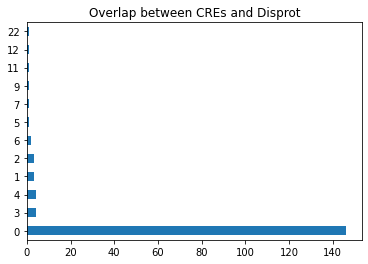

In [91]:
cre.Count_disprot.value_counts().plot(kind= 'barh')
plt.title("Overlap between CREs and Disprot")

In [4]:
#cre[cre.Count_disprot == 22]

In [3]:
# df = disprot_raw[disprot_raw.term_namespace == "Structural state"]
# df[df.acc == 'P04637']

In [1]:
#disprot[disprot.Chromosome == 'P04637']

In [2]:
#cre_dataset[cre_dataset.uniprot_acc == 'P04637']

---

---

# Evaluate the percentage of coverage between CREs and IDRs (from mobidb)

In [40]:
cre_coord = cre_dataset[['uniprot_acc', 'id_cre', 'start_aa', 'end_aa']].sort_values('uniprot_acc')

In [41]:
cre_coord.uniprot_acc.nunique()

151

In [29]:
mobidb_coord = mobidb_lite[['acc', 'start', 'end']].rename(columns= {'acc': 'uniprot_acc', 'start': 'start_idr', 'end': 'end_idr'})

In [34]:
mobidb_coord.uniprot_acc.nunique()

115

In [44]:
df = cre_coord.merge(mobidb_coord, how= 'left')
df

,uniprot_acc,id_cre,start_aa,end_aa,start_idr,end_idr
0,A8KAM8,43,1006,1106,1019.0,1106.0
1,C8ZE58,15,604,741,1.0,28.0
2,C8ZE58,15,604,741,673.0,705.0
3,C8ZE58,15,604,741,734.0,756.0
4,O08722,124,544,688,NaN,NaN
...,...,...,...,...,...,...
331,Q9Y613,65,1081,1145,566.0,619.0
332,Q9Y613,65,1081,1145,1020.0,1143.0
333,Q9Z0R4,132,1151,1205,310.0,356.0
334,Q9Z0R4,132,1151,1205,614.0,706.0


In [46]:
mobidb_coord[mobidb_coord.uniprot_acc == 'Q9Z0R4']

,uniprot_acc,start_idr,end_idr
114,Q9Z0R4,310,356
114,Q9Z0R4,614,706
114,Q9Z0R4,827,863


In [47]:
cre_coord[cre_coord.uniprot_acc == 'Q9Z0R4']

,uniprot_acc,id_cre,start_aa,end_aa
131,Q9Z0R4,132,1151,1205


In [48]:
df[df.uniprot_acc == 'Q9Z0R4']

,uniprot_acc,id_cre,start_aa,end_aa,start_idr,end_idr
333,Q9Z0R4,132,1151,1205,310.0,356.0
334,Q9Z0R4,132,1151,1205,614.0,706.0
335,Q9Z0R4,132,1151,1205,827.0,863.0
